In [ ]:
#importing the basic libraries
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D

In [ ]:
%matplotlib inline

In [ ]:
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

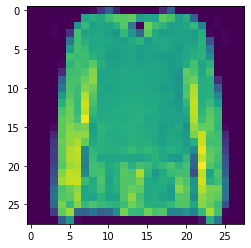

In [ ]:
plt.imshow(train_x[18])

In [ ]:
train_y[18]

6

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
train_x=train_x.reshape(-1,28,28,1)

In [ ]:
test_x=test_x.reshape(-1,28,28,1)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')
train_x=train_x/255
test_x=test_x/255

In [ ]:
train_x[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
train_y_one_hot=to_categorical(train_y)
test_y_one_hot=to_categorical(test_y)

In [ ]:
print(train_y[0])
print(train_y_one_hot[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_label,valid_label=train_test_split(train_x,train_y_one_hot,test_size=0.2)

In [ ]:
import keras
#from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import keras.models as models

In [ ]:
num_classes=10
epochs=20
batch_size=64

In [ ]:
model=tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(128,activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

In [ ]:
from keras.engine.training import optimizers
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [48]:
model_trained=model.fit(train_x,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_x,valid_label))


Epoch 1/20
750/750 [==============================] - 175s 232ms/step - loss: 0.4567 - accuracy: 0.8356 - val_loss: 0.2981 - val_accuracy: 0.8879
Epoch 2/20
750/750 [==============================] - 169s 226ms/step - loss: 0.2650 - accuracy: 0.9027 - val_loss: 0.2474 - val_accuracy: 0.9090
Epoch 3/20
750/750 [==============================] - 166s 221ms/step - loss: 0.2168 - accuracy: 0.9202 - val_loss: 0.2248 - val_accuracy: 0.9162
Epoch 4/20
750/750 [==============================] - 164s 218ms/step - loss: 0.1829 - accuracy: 0.9322 - val_loss: 0.1986 - val_accuracy: 0.9270
Epoch 5/20
750/750 [==============================] - 162s 216ms/step - loss: 0.1541 - accuracy: 0.9433 - val_loss: 0.2275 - val_accuracy: 0.9163
Epoch 6/20
750/750 [==============================] - 160s 213ms/step - loss: 0.1277 - accuracy: 0.9523 - val_loss: 0.2211 - val_accuracy: 0.9213
Epoch 7/20
750/750 [==============================] - 160s 213ms/step - loss: 0.1071 - accuracy: 0.9597 - val_loss: 0.2204 -